![](cover.png)

# kMeans(分群)

## 介紹

kMeans跟之前介紹的決策樹和kNN有一個決定性的不同，就是他是一個非監督式演算法

有時候我們的數據太大量了，又沒人可以幫忙填寫正確的標籤，我們就希望電腦可以自動的幫我把標籤算出來。

你也可以想像成：非監督式學習就是讓電腦去判斷標籤的過程

注意: 雖然他跟kNN都有個k，但實際的內容卻是完全不一樣的

![](kmeans.png)


## ✔ 理論基礎

### KMeans

k意味著在所有的資料裡選出k個質量中心，也就是以這k個質量中心分成k類，詳細步驟如下

1. 隨機選擇k個點當中心

2. 對於剩餘的點歸類到k類

3. 對於分類好的資料再次選擇一次k個質量中心(讓質量中心更接近理想)

4. 重複步驟2和3直到穩定

### KMeans++

你也發現了，我們的第一步驟，有可能選到非常爛的點當初始中心，那你就會花很多的步驟達到最後的穩定。

所以後來的人做了個改進，就是在選初始k點的時候盡量選遠一點的！這就是kMeans++

## ✔ k值的選擇

k值的選擇總共有兩種方法，我們先介紹第一種方法，後續再用第二種方法比較

第一種方法非常簡單，你想像成你已經知道數據有n類了(ex. 鳶尾花有三類)，只是沒有人幫你標注這些類別

那毫無疑問的就是直接將k設定成你知道的n！

## ✔ 開始撰寫程式

### Step 0. 讀入我們的鳶尾花數據集作為練習

這裡我們用鳶尾話數據集來做實驗，但在訓練模型的時候我當作完全沒有target這件事

target只用來在最後我的分群完成以後偷偷來看一下分的好不好

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 為了顯示的漂亮, 我刻意的把印出來的row只顯示15個和column只顯示十個, 大家練習的時候可以去掉下面兩行
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)

# 使用scikit-learn提供的鳶尾花資料庫
iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
...,...,...,...,...,...
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2


### Step 1. (略過) 畫圖

因為我們已經畫過很多次了，這次就先把heatmap略過，讀者可以自行練習一下！

In [2]:
# 我們把我們擁有的資料集分成兩份, 一份測試, 一份訓練
from sklearn.model_selection import train_test_split
# 把資料分成兩部分(1. 訓練資料 2. 測試資料)
data_train, data_test, target_train, target_test = train_test_split(iris['data'], 
                                                                    iris['target'], 
                                                                    test_size=0.1)

### Step 2. 訓練模型

我們使用kMeans來訓練

1. 創好一個Cluster
2. 使用fit將你要訓練的數據餵進來

In [3]:
from sklearn.cluster import KMeans
# 我事先已經有三類了, 只是別人沒有幫我標註
# 所以這裡要注意！！我完全沒有帶入target喔
clu = KMeans(n_clusters = 3)
clu.fit(data_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
# 我們大概可以看到資料已經被分成三類了
clu.labels_

array([2, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 1, 0, 2, 1,
       2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 0,
       1, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 1,
       2, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 2, 1, 0, 1, 0, 0], dtype=int32)

In [5]:
from sklearn.metrics import accuracy_score

predict = clu.predict(data_test)
print("預測標籤:", predict)
print("正確標籤:", target_test)

預測標籤: [0 1 0 2 2 1 1 2 0 1 0 2 1 2 0]
正確標籤: [0 1 0 2 2 1 1 2 0 1 0 2 1 2 0]


你可以看到我們已經正確的預測了，不過這裡有時候要小心，因為我們沒有事先給標籤

所以預測的1並不一定是正確標籤的1。你要稍微做個轉換再來對照

## ✔ 不知道k的時候

當我們連k都不知道的時候(ex. 分類人的性格，你不知道要分成幾種分類)

我們只能一個一個開始試，不過我們有一個很好的方法可以幫我們測試選的k究竟好不好

### Silhouette方法

Silhouette是檢查一個點是不是分在最佳群的方法

![](sihouette.png)

***a是這個點離他所在群內的其他點的平均距離，b是這個點離他最鄰近的群的點的平均距離***

這個值會在-1~1之間

算出來的值越大，代表這個k的選擇越好，我們只看上面的 1 - a/b，這東西要是1的話，a必須為0，也就是這個群根本就完美的聚集在一個點上

所以簡單來說，我們希望每一個點離他所在的群越近，離另外的群越遠，就是最棒的分類

分數: [0.68081362027135084, 0.55259194452136762, 0.49699284994925963, 0.48851755085386322, 0.3665040147525056, 0.35087596034100871]
K值: [2, 3, 4, 5, 6, 7]


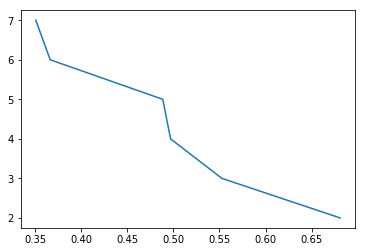

In [9]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

scores = []
ks = []

for i in range(2, 8):
    clu = KMeans(n_clusters = i)
    clu.fit(iris['data'])
    clu_score = silhouette_score(iris['data'], clu.labels_)
    scores.append(clu_score)
    ks.append(i)

print("分數:", scores)
print("K值:", ks)
plt.plot(scores, ks)


你可以看到，大概只有k = 2和k = 3的時候是一個合理的選擇，符合我們所知道的！

總共有三類的鳶尾花，那2為什麼也有很高的score呢？我們可以合理的推測其實這三類有兩類是很像的！